In [ ]:
import io
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as plt
import plotly.graph_objs as go
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['ml.csv']))
df.head(5)

Saving ml.csv to ml (1).csv


,Unnamed: 0,Rating,Size,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,aws,excel,sql,keras,scikit,tensor,mongo,job_title_sim,seniority_by_title
0,0,3.8,501 - 1000,1973,0,0,53,91,72.0,48,1,0,1,0,0,0,0,0,data scientist,na
1,1,3.4,10000+,1984,0,0,63,112,87.5,37,1,0,0,0,0,0,0,0,data scientist,na
2,2,4.8,501 - 1000,2010,0,0,80,90,85.0,11,1,0,1,1,0,0,0,0,data scientist,na
3,3,3.8,1001 - 5000,1965,0,0,56,97,76.5,56,1,0,0,0,0,0,0,0,data scientist,na
4,4,2.9,51 - 200,1998,0,0,86,143,114.5,23,1,0,1,1,0,0,0,0,data scientist,na


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          742 non-null    int64  
 1   Rating              742 non-null    float64
 2   Size                742 non-null    object 
 3   Founded             742 non-null    int64  
 4   Hourly              742 non-null    int64  
 5   Employer provided   742 non-null    int64  
 6   Lower Salary        742 non-null    int64  
 7   Upper Salary        742 non-null    int64  
 8   Avg Salary(K)       742 non-null    float64
 9   Age                 742 non-null    int64  
 10  Python              742 non-null    int64  
 11  aws                 742 non-null    int64  
 12  excel               742 non-null    int64  
 13  sql                 742 non-null    int64  
 14  keras               742 non-null    int64  
 15  scikit              742 non-null    int64  
 16  tensor  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



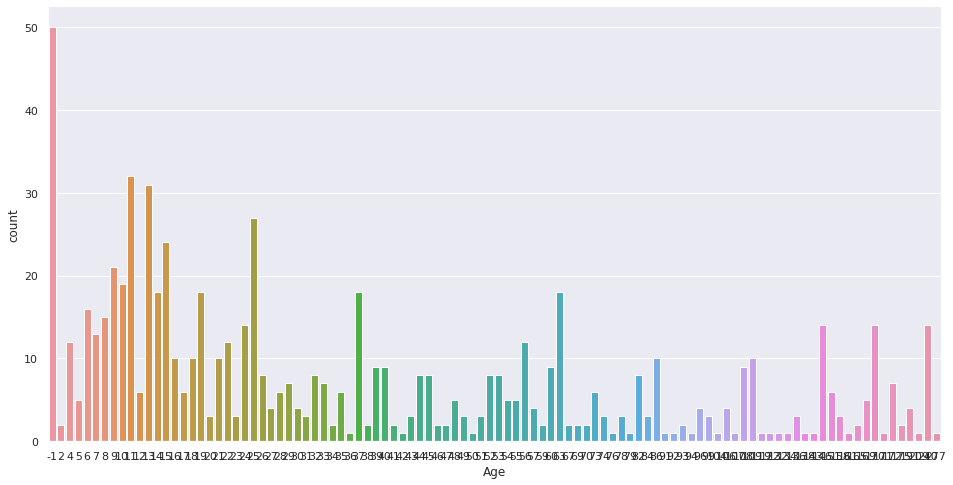

In [ ]:
sns.countplot(df["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



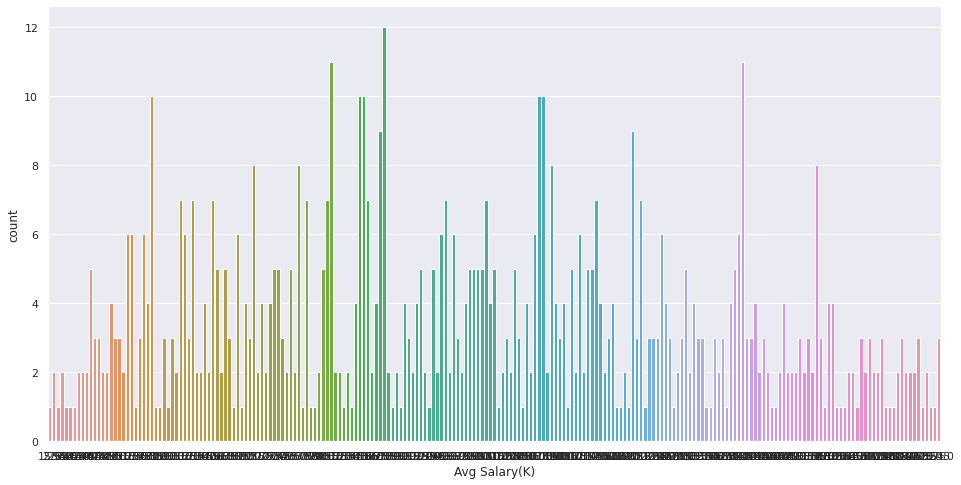

In [ ]:
sns.countplot(df["Avg Salary(K)"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



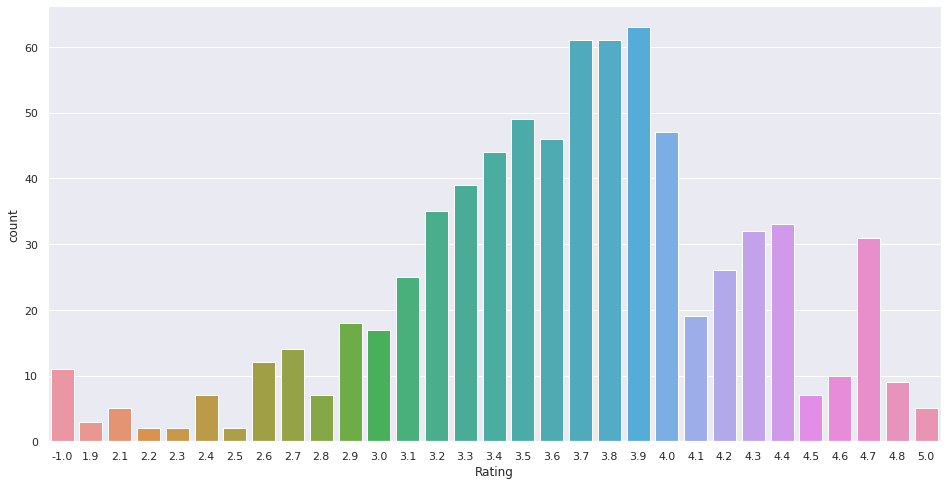

In [ ]:
sns.countplot(df["Rating"])
sns.set(rc={'figure.figsize':(16,8)})

In [ ]:
df_1=df['Rating']
df_2=df['Founded']
df_3=df['Size']
df_4=df['Age']
df_5=df['Hourly']
df_6=df['job_title_sim']

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Converts string labels into integer.
df_t=le.fit_transform(df_1)
df_t2=le.fit_transform(df_2)
df_t3=le.fit_transform(df_3)
df_t4=le.fit_transform(df_4)
df_t5=le.fit_transform(df_5)
df_t6=le.fit_transform(df_6)
#df_encoder= df_encoder.reshape(-1, 1)
print("Job title Numerical values")
print(df_t)
print("Locatiton Numerical values")
print(df_t2)
print("Size Numerical values")
print(df_t3)
print("Sector")
print(df_t4)
print("This is for avg salary (k)")
print(df_t5)
print("Job location in numerical value")
print(df_t6)

Job title Numerical values
[19 15 29 19 10 15 22 19 14 27 16 22 13 22 18 17 20 24 23 21 13 20 19 24
 21 21 16 18 21 29 19 17 19 19 28 23 16 28 16 16 23 17 23 15 24 30 18 12
 28 18 19 14 27 18 18 16 22 28 22 15 25 24 19 19 19  9 28 12 13 21 25 17
  8 20 12 21 24  1 14 25 20 28 26 24 21 25 13 19 23 26 16 16 20 28 23 15
 13 20 12 22 19 28 24 23 20 14 28 24 10 26 15 18 27 13 21 27  9 28 11 13
 25 16 21 24  4 21 17 19 18 25 21 13 10 19 24 15 22 24 30 24 18 23 24  7
 19 20 24 19 19 19 29 25 20 15 17 20 19 18 19 16 20 23 23 16 10 17  8 25
 21 24 23 17 18  9 18 14  0 17 18 15 22  7 13 20 28 18 10 11 28 18 14 21
 25 20 14 22 17 21  5  7 16 11 17 14  8 15 19 18 29 19 15 24 29 15 20 15
 12 13 24 17 20 19  9 18 15 21 16 19 18 16 23 21 24 28 16 25 22 10  6 23
 20 24  8 20 15 19 17 14 15 11 21 18 25 24 21 21 13 23 20 18 17 18  9 23
 21 16  0 13 14 20 18 17 15 16 24 22  7 17 16 17  4 20 21 22 13 28 23 27
 18 18 25 18 20 17 11 15 22 19 21 20  0 25 19 19  3 10 22 18 19 17 28 16
 14 25 14 15 21 25 19 16

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
# split X and y into training and testing sets
X = df.drop(['job_title_sim'], axis=1)

y = df['job_title_sim']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((519, 19), (223, 19))

In [ ]:
encoder = ce.OneHotEncoder(cols=['Rating','Founded','Size','Hourly','Avg Salary(K)'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [ ]:
ft1 = list(zip(df_t,df_t2))
ft2 = list(zip(df_t3,df_t4))
ftf = list(zip(ft1,ft2))
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
#training sets
model.fit(ft2,df_t3)
#Predict Output
predicted= model.predict([[0,2]])
print(predicted)

[0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ft1,df_t4, test_size=0.4)
knn = KNeighborsClassifier(n_neighbors=1)
#training sets
knn.fit(X_train, y_train)
#predicting the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# Model Accuracy
print("accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy: 0.8383838383838383
[[15  0  0 ...  0  0  0]
 [ 0  5  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           2       1.00      0.83      0.91         6
           3       0.00      0.00      0.00         0
           4       1.00      0.75      0.86         4
           5       1.00      0.75      0.86         4
           6       0.89      1.00      0.94         8
           7       1.00      1.00      1.00         7
           8       0.75      1.00      0.86         6
           9       1.00      0.87      0.93        15
          10       1.00      1.00      1.00         1
          11       1.00      0.86      0.92        14
          12       0.58      1.00      0.74         7
          13       1.00      0.79      0.88        14
          14       1.00      1.00      1.00         4
    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

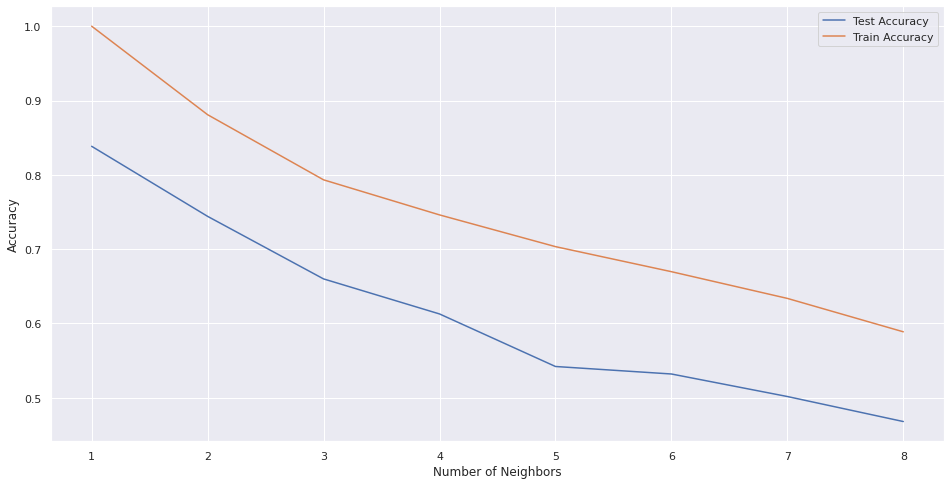

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#loop for diff val of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    #fiting training data
    knn.fit(X_train, y_train)
    #compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

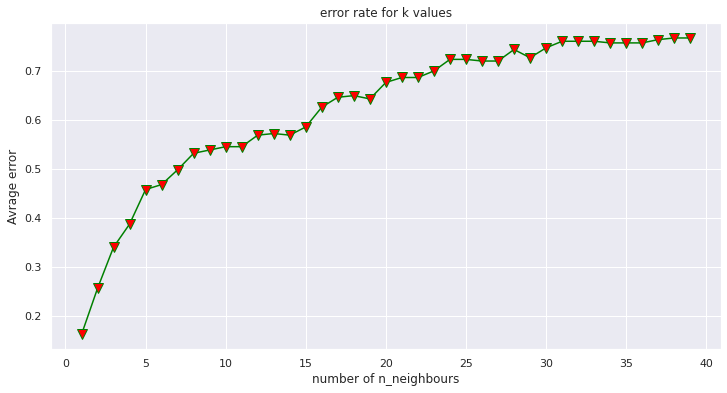

In [ ]:
error = []
#error ploting diff k val
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle= 'solid', marker='v',markerfacecolor='red', markersize=10)
plt.title('error rate for k values')
plt.xlabel('number of n_neighbours')
plt.ylabel('Avrage error')
plt.savefig('errork.png')

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(ft2,df_t3)
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [ ]:
y_pred = nbModel.predict(X_test)
print(y_pred)

[7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 1 6 6 6 6 6
 6 6 4 6 7 6 6 7 6 6 6 6 6 7 6 6 6 6 6 6 7 6 6 7 6 6 6 6 6 6 6 6 6 7 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 7 6 6 6 7 0 6 6 6 6 6 6 6
 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 5
 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6
 7 6 6 5 6 6 7 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6]


In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(df_t,df_t)))


Model accuracy score: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")

[[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] : is the confusion matrix


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.20      0.32        15
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.03      1.00      0.06         8
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00        11
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([ 98,  51,  12,  12,  52,  13,  11,  35,  65,   8,  11,  26,   9,
        90,  17,  43,  69,   6,  69,  20,  11,  55,  22,  55,  20,  15,
        20,  88,  23,   0,  25,  19,  94,  54,  13,  69,  38,  58,  35,
        33,  60,   0,  17,  62, 100,   2,  88,  17,  54,  13,   0,  55,
        35,  58,   7,  13,   7, 100,   6,  58,   0,  46,  68,  94,  35,
        19,   5,  58,  75,   9, 100,  79,  37,   7,  16,  20,  26,  12,
         9,  11,   6,  63,  20,  69,  42,   4,  83,  13,   8,   9,  41,
        96,  75,  57,  19,   0,  23,   6,  98,  65,  19,   2, 100,   2,
         4,  35,  97,  94,  17,   0,  57,  28,  11,  14,  16,  10,   0,
        13,  94,  15,   6,   9,  50,  79,   9,  33,   9,  13,  17,  79,
        35,  88,  30,   2,  45,  35,  51,  53,   0,  31,  58,  69,  26,
        35,  14,  79,   8,  13,  93,  75,  13, 100,  23,  21,  14,  57,
         7,  23,  22,  17,  62,  23,  90,   0,  35,  88,  22,   4,   7,
         9,   9,  17,   9,  16,  43,   5,  11,  88,  24,   9,   

In [ ]:
print('Accuracy: With Linear Kernel')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy: With Linear Kernel
0.9191919191919192


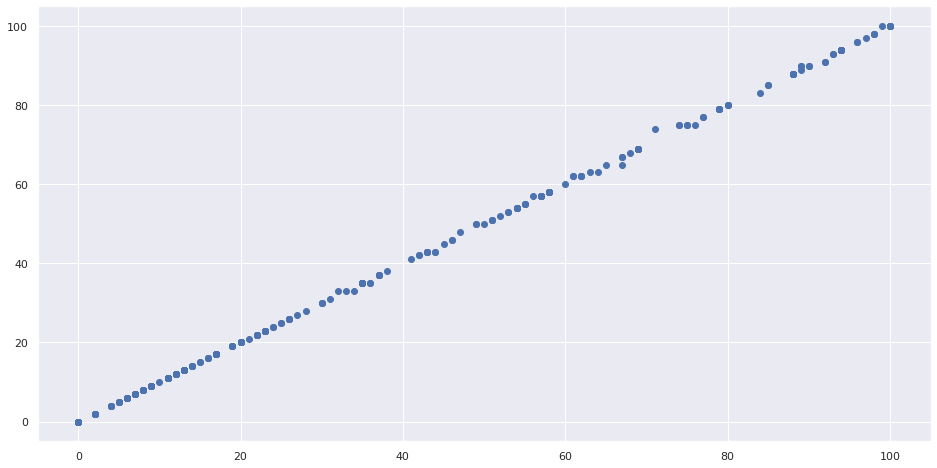

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

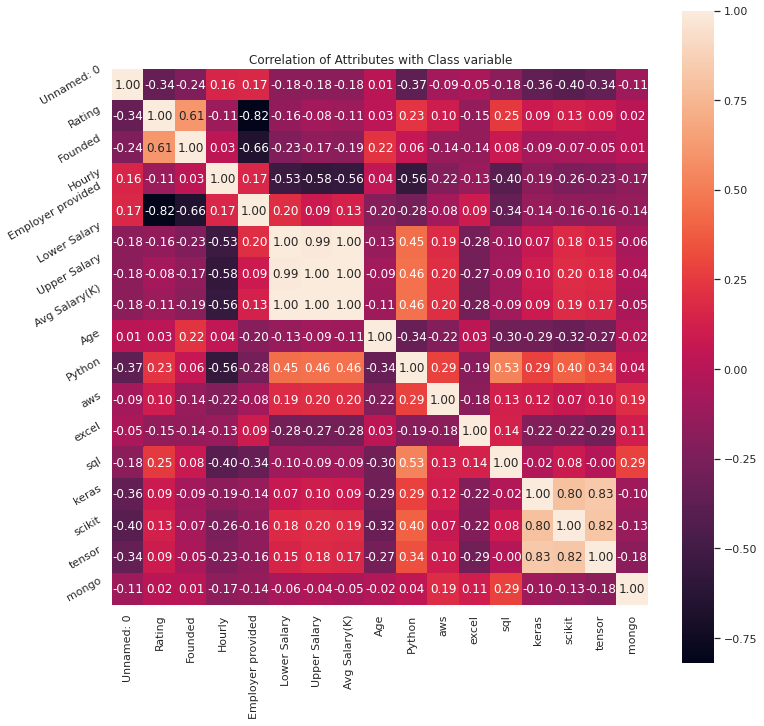

In [ ]:
correlation = df.corr()
correlation['Rating'].sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

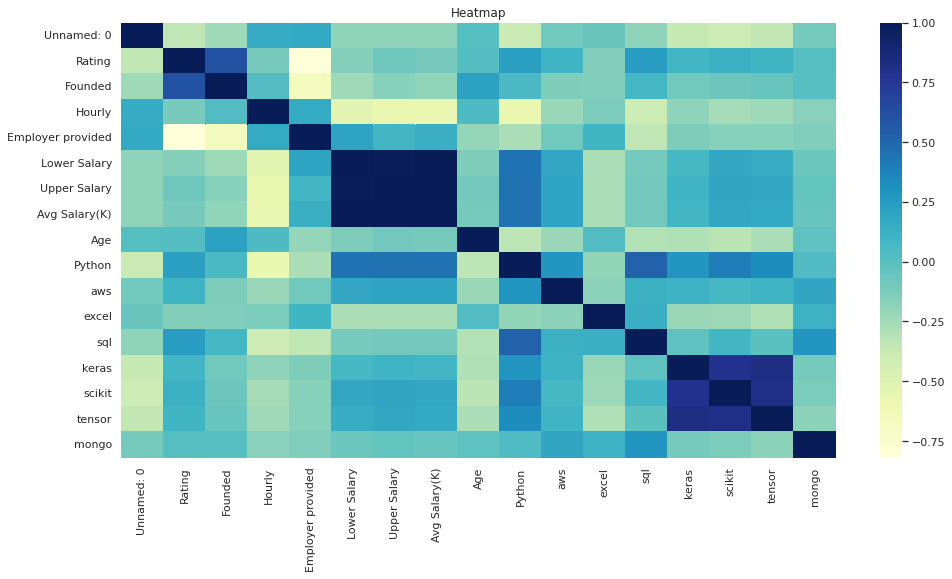

In [ ]:
plt.figure(figsize=(16, 8))
df = df.corr()
sns.heatmap(df, cmap='YlGnBu')
plt.title('Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.03):
    seed(42)
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    model.add(Dropout(dr))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(3, activation='relu'))  
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model
    model = create_model()


In [ ]:
training = model.fit(X_train, y_train)